<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/HES3_003a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary Statistics of M at t=500
Mean: 0.12506
Std Dev: 0.07420
Min: 0.00000
Max: 0.20000

Top 5 Dominant Eigenvalues:
1: 14.49064
2: 0.29727
3: 0.06149
4: 0.02503
5: 0.01357


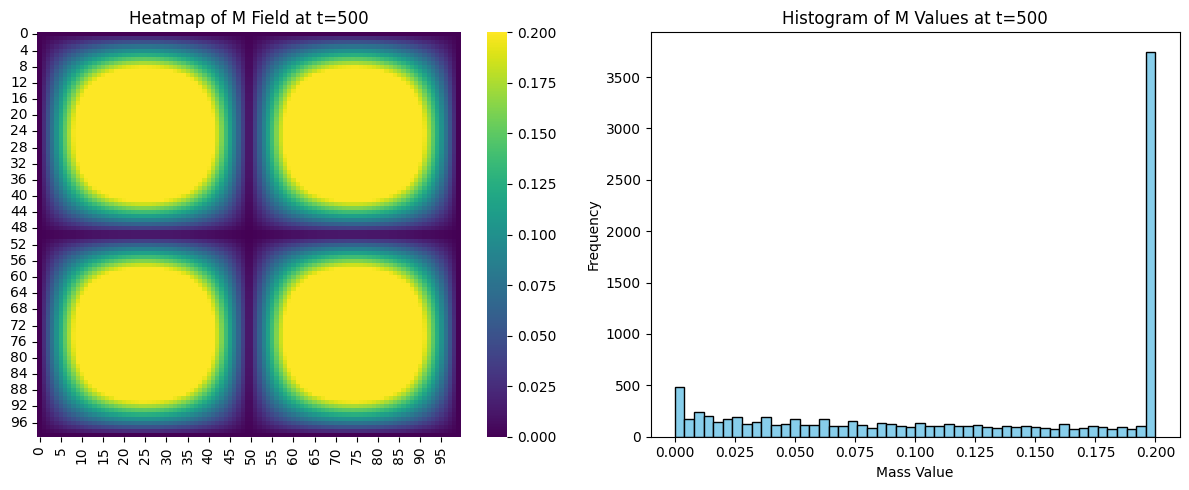

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- FIXED PARAMETERS ---
N = 100
KAPPA = 0.05
ETA_SEED = 0.01
SEEDING_CUTOFF = 500
np.random.seed(101)

# --- Generate Fixed Template s_T ---
s_temp = np.sin(np.linspace(0, 2*np.pi, N))
s_temp = np.outer(s_temp, s_temp)
s_temp = (s_temp - np.mean(s_temp)) / np.std(s_temp)
s_T = np.clip(s_temp, -1, 1)

# --- Evolve M field until t = 500 ---
M = np.zeros((N, N))
for step in range(SEEDING_CUTOFF):
    M_seed = ETA_SEED * np.abs(s_T)
    M_decay = KAPPA * M
    M = M + M_seed - M_decay
    M = np.clip(M, 0, None)

# --- Phase I: Geometric Catalog ---
print("Summary Statistics of M at t=500")
print(f"Mean: {np.mean(M):.5f}")
print(f"Std Dev: {np.std(M):.5f}")
print(f"Min: {np.min(M):.5f}")
print(f"Max: {np.max(M):.5f}")

# --- Spectral Decomposition ---
eigenvalues = np.linalg.eigvalsh(M)
top_eigenvalues = sorted(eigenvalues, reverse=True)[:5]
print("\nTop 5 Dominant Eigenvalues:")
for i, val in enumerate(top_eigenvalues):
    print(f"{i+1}: {val:.5f}")

# --- Visualizations ---
plt.figure(figsize=(12, 5))

# Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(M, cmap='viridis')
plt.title("Heatmap of M Field at t=500")

# Histogram
plt.subplot(1, 2, 2)
plt.hist(M.flatten(), bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of M Values at t=500")
plt.xlabel("Mass Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
